In [46]:
import pandas as pd
import numpy as np
import ast
from sklearn.cluster import KMeans

In [47]:
filename = '../data/embeddings.csv'

# Read the TSV file into a pandas DataFrame
df = pd.read_csv(filename, on_bad_lines='warn')

In [48]:
df['Embedding'] = df['Embedding'].apply(ast.literal_eval)
df['Embedding'] = df['Embedding'].apply(lambda x: [float(num) for num in x])

df

,auid,name,EthnicSeer,prop,lastname,firstname,Ethnea,Genni,SexMac,SSNgender,Highest_probF_ethnicity,Highest_probF_value,Embedding
0,9731334_2,Cameron 'Dale' Bass,ITA,0.653567,'Dale' Bass,Cameron,ENGLISH,M,mostly_male,-,ENGLISH,92.191,"[0.0027535639237612486, -0.006899471394717693,..."
1,2155715_1,Bert Hart,ENG,0.772359,Hart,Bert,DUTCH,M,male,M,DUTCH,87.200,"[-0.012196633964776993, -0.034759119153022766,..."
2,7867892_1,Leen Hart,ENG,0.980865,Hart,Leen,DUTCH,-,male,F,DUTCH,98.679,"[0.00720670260488987, -0.011822231113910675, 0..."
3,14609221_2,Esther Nolte- Hoen,GER,0.665081,Nolte- Hoen,Esther,GERMAN,F,female,F,HISPANIC,43.243,"[-0.02559061162173748, -0.02379501983523369, -..."
4,8101337_1,Ellen 't Hoen,CHI,0.665526,'t Hoen,Ellen,DUTCH,F,female,F,DUTCH,37.459,"[-0.014605682343244553, -0.030205124989151955,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,8296003_1,Luigi Lazzari Agli,ITA,0.999036,Lazzari Agli,Luigi,ITALIAN,M,male,M,ITALIAN,97.564,"[0.004992321133613586, -0.012878835201263428, ..."
996,10750176_2,Marlene Aglony,GER,0.397017,Aglony,Marlene,HISPANIC,F,female,F,HISPANIC,36.237,"[-0.03219403699040413, -0.00232181278988719, 0..."
997,15564501_6,Habibatou Diallo-Agne,FRN,0.998308,Diallo-Agne,Habibatou,AFRICAN,F,andy,F,AFRICAN,76.961,"[-0.01831855997443199, 0.003941226284950972, -..."
998,69097_2,Giancarlo Agnelli,ITA,0.999509,Agnelli,Giancarlo,ITALIAN,M,male,M,ITALIAN,99.122,"[-0.008049694821238518, 0.009363795630633831, ..."


In [49]:
# Convert the 'Embedding' column to a numpy array
X = np.array(df['Embedding'].tolist())

# Normalize the embeddings
X_normalized = X / np.linalg.norm(X, axis=1, keepdims=True)

# Apply K-means clustering
kmeans = KMeans(n_clusters=20, random_state=0)
kmeans.fit(X_normalized)

distances = kmeans.transform(X_normalized)
print(distances)

y_kmeans = kmeans.predict(X_normalized)
print(y_kmeans[0:10])
print(len(y_kmeans))

/Users/zara/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[0.47613709 0.48879973 0.48662272 ... 0.50320499 0.45711369 0.49785953]
 [0.48626434 0.52706746 0.50495908 ... 0.50614941 0.4666577  0.5002786 ]
 [0.5140777  0.50894947 0.46956894 ... 0.51832342 0.4972848  0.48832905]
 ...
 [0.52426056 0.41144136 0.4316225  ... 0.52101086 0.48286299 0.50999588]
 [0.42093596 0.50664565 0.49002719 ... 0.44001258 0.4811751  0.50258994]
 [0.49185421 0.53550426 0.48440737 ... 0.52049759 0.42074948 0.52070125]]
[ 3  3  5  3  5  9  5 15  9 18]
1000


In [50]:
df['Cluster'] = y_kmeans


In [53]:
# Sort DataFrame by 'Cluster' column
df_sorted = df[['firstname', 'Cluster', 'Highest_probF_ethnicity', 'Highest_probF_value']].sort_values(by='Cluster')

# Export sorted DataFrame to CSV file
df_sorted.to_csv('../data/embeddings_sorted.csv', index=False)

print("Sorted embeddings saved to embeddings_sorted.csv.")

Sorted embeddings saved to embeddings_sorted.csv.


In [54]:
cluster_1_names = df[df['Cluster'] == 0]['firstname']
print(cluster_1_names)

22        Miguel
31        Sergio
33         Pedro
120    Francisco
123      Enrique
125       Javier
128        Pablo
131        Josep
134        Cesar
136      Gustavo
141      Ignacio
143        Julio
148        Jorge
154       Manuel
155      Alfonso
358      Anselmo
419       Camilo
457      Pascual
459       Agusti
498        Pilar
506     Sonsoles
568        Esper
577       Nestor
597       Antero
643       Arturo
646        Artur
648     Salvador
665      Horacio
669         Hugo
673    Alejandro
676     Mauricio
691      Rosario
703       Amparo
712      Armando
720     Baudilio
723        Jaime
731    Guillermo
732       Victor
908       Gustav
Name: firstname, dtype: object


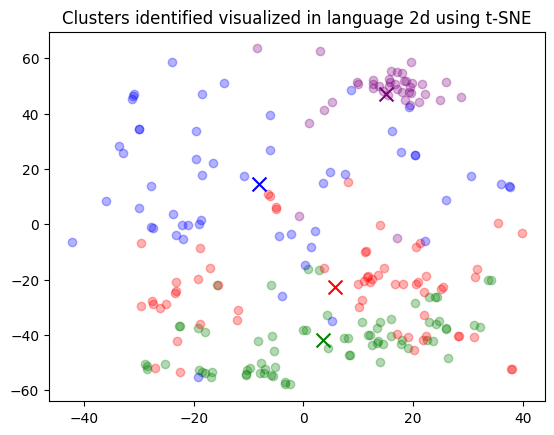

In [55]:
from sklearn.manifold import TSNE
import matplotlib
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=15, random_state=42, init="random", learning_rate=200)
vis_dims2 = tsne.fit_transform(X)

x = [x for x, y in vis_dims2]
y = [y for x, y in vis_dims2]

for category, color in enumerate(["purple", "green", "red", "blue"]):
    xs = np.array(x)[df.Cluster == category]
    ys = np.array(y)[df.Cluster == category]
    plt.scatter(xs, ys, color=color, alpha=0.3)

    avg_x = xs.mean()
    avg_y = ys.mean()

    plt.scatter(avg_x, avg_y, marker="x", color=color, s=100)
    plt.title("Clusters identified visualized in language 2d using t-SNE")